# MOD 300: Assignment 3

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Oct 27, 2025**


In [12]:
# Import required packages
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import dna
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# TOPIC 1: Calculate DNA volume via Monte Carlo simulation.


**Task 0**

We define a simulation box in 3d space by specifying its upper bound. Since we are dealing with DNA, we chose to use nanometer as unit.


In [13]:
box = dna.SimulationBox(20,20,20)

**Task 1**


We create a random point inside the simulation box using uniform distribution.


In [14]:
point = dna.create_random_point(box)

**Task 2**

We use our function for creating an random sphere inside the box.


In [15]:
sphere = dna.create_random_sphere(box)
print(sphere)


SPHERE X: 2.39 Y: 5.62 Z: 13.89 Radius: 2.3


**Task 3**

We have defined an function that checks if a point is inside an sphere. To check that our function actually works, we manually define two points, one that is at the sphere center (inside point) and one that is just outside the radius (outside point)


In [16]:
point_inside = dna.Point(sphere.center.x, sphere.center.y, sphere.center.z)
point_outside = dna.Point(sphere.center.x + sphere.radius + 1, sphere.center.y, sphere.center.z)

assert sphere.is_point_inside(point_inside), "This point should be inside!"
assert not sphere.is_point_inside(point_outside), "The point should be outside!"

print("Function works!")


Function works!


**Task 4**


We estimate the fraction of randomly generated points that are inside a sphere using a Monte Carlo simulation. The simulation generates points uniformly inside the simulation box and counts how many points are contained in the sphere. The fraction is calculated as:

$$
\text{Fraction} = \frac{\text{Number of points inside the sphere}}{\text{Total number of points}}
$$


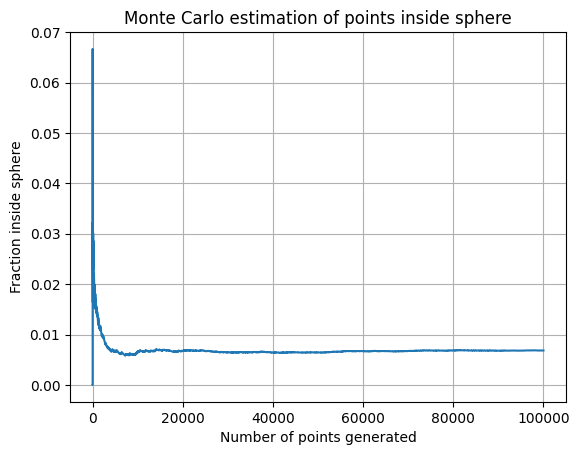

In [17]:
fraction_estimate = dna.monte_carlo_fraction_inside_sphere(sphere, box, plot=True)

We compare the Monte Carlo estimate of the fraction of points inside the sphere with the theoretical expectation. The expected fraction is calculated as the ratio of the sphere’s volume to the simulation box’s volume:


In [18]:
expected_fraction = sphere.get_volume() / box.get_volume()

print("Expected (volume ratio):", expected_fraction)
print("Monte Carlo result:", fraction_estimate)

Expected (volume ratio): 0.0063870347790317165
Monte Carlo result: 0.00684


# Task 5


We estimate π by randomly generating points inside a cube and checking how many end up inside a sphere. The sphere is as big as possible so that more random points will end up inside the sphere and it gives better statistical accuracy.


In [19]:
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

box = dna.SimulationBox(20, 20, 20)
sphere = dna.Sphere(dna.Point(10, 10, 10), 10)

for sample_size in sample_sizes:
    print(dna.estimate_pi(sample_size, sphere, box))

3.5999999999999996
3.0
2.958
3.1308000000000002
3.1648199999999997
3.1648199999999997
3.1418040000000005
3.1418040000000005


# Task 6

Generate 10 random spheres in the simulation box

In [20]:
box = dna.SimulationBox(20, 20, 20)

spheres = [dna.create_random_sphere(box) for _ in range(10)]

for i, sphere in enumerate(spheres, 1): 
    print(f"Sphere {i}: {sphere}")

Sphere 1: SPHERE X: 12.53 Y: 12.36 Z: 10.83 Radius: 6.72
Sphere 2: SPHERE X: 8.98 Y: 7.54 Z: 10.01 Radius: 7.19
Sphere 3: SPHERE X: 11.33 Y: 11.46 Z: 8.8 Radius: 8.45
Sphere 4: SPHERE X: 9.89 Y: 10.06 Z: 9.98 Radius: 9.86
Sphere 5: SPHERE X: 11.48 Y: 9.4 Z: 11.64 Radius: 4.66
Sphere 6: SPHERE X: 3.86 Y: 5.45 Z: 9.06 Radius: 2.64
Sphere 7: SPHERE X: 18.13 Y: 10.5 Z: 13.5 Radius: 1.52
Sphere 8: SPHERE X: 9.91 Y: 8.05 Z: 11.32 Radius: 5.2
Sphere 9: SPHERE X: 18.7 Y: 16.59 Z: 6.57 Radius: 0.01
Sphere 10: SPHERE X: 7.7 Y: 11.31 Z: 8.22 Radius: 6.99


# Task 7

Calculate and plot the fraction of points INSIDE the sphere divided by the number of randomly generated points. 

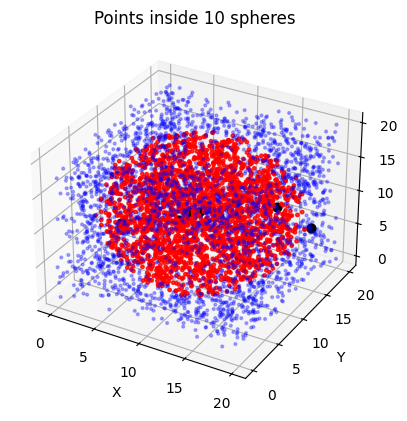

In [21]:
fractions = dna.fraction_inside_sphere(spheres, box, n_points=100_000, plot=True);

## Task 8

Read the DNA coordinates file and assign atomic radii to each atom based on the periodic table.


We use van der Waals radii (in Angstroms) for each element to determine the size of each atomic sphere.


In [ ]:
# Task 8 — Read DNA coordinates (clean cell)
atoms = dna.read_and_report('dna_coords.txt')


Total atoms: 259

First 10 atoms:
Atom 1: Element=H, X=-48.18, Y=1.75, Z=-1.22, Radius=0.53 Å
Atom 2: Element=O, X=-48.07, Y=1.26, Z=-0.41, Radius=0.48 Å
Atom 3: Element=P, X=-46.63, Y=1.28, Z=-0.00, Radius=0.98 Å
Atom 4: Element=O, X=-46.41, Y=2.54, Z=0.73, Radius=0.48 Å
Atom 5: Element=O, X=-45.84, Y=1.10, Z=-1.24, Radius=0.48 Å
Atom 6: Element=O, X=-46.38, Y=0.04, Z=0.97, Radius=0.48 Å
Atom 7: Element=C, X=-47.32, Y=-0.21, Z=2.04, Radius=0.67 Å
Atom 8: Element=C, X=-46.59, Y=-0.77, Z=3.24, Radius=0.67 Å
Atom 9: Element=O, X=-46.38, Y=-2.20, Z=3.03, Radius=0.48 Å
Atom 10: Element=C, X=-45.19, Y=-0.22, Z=3.50, Radius=0.67 Å

Atomic radii mapping:
H: 0.53 Å
C: 0.67 Å
N: 0.56 Å
O: 0.48 Å
P: 0.98 Å


# Task 9 & 10 — Simulation box and Monte Carlo DNA volume

we are going to build a tight simulation box around the atoms (units consistent: Angstrom -> nm),
then estimate the DNA volume by Monte Carlo sampling of the union of atomic spheres.

In [ ]:
# Task 9 — Build tight simulation box (clean cell)
padding_nm = 0.5
box = dna.generate_atoms_box(atoms, units='angstrom', padding_nm=padding_nm, verbose=True)


Box bounds (nm):
  x: -5.3711 to -2.5243  (size 2.8468 nm)
  y: -2.3251 to 0.8022  (size 3.1273 nm)
  z: -1.5472 to 1.5377  (size 3.0849 nm)
Box volume: 27.464240 nm^3


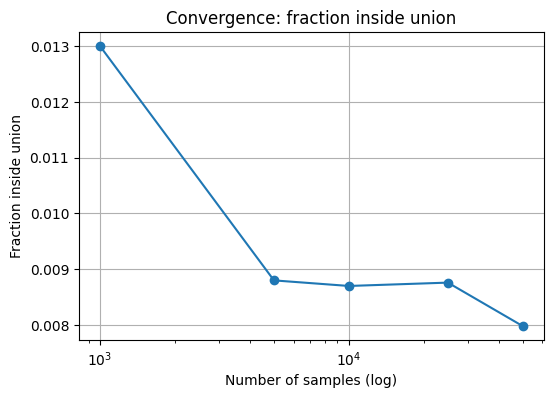

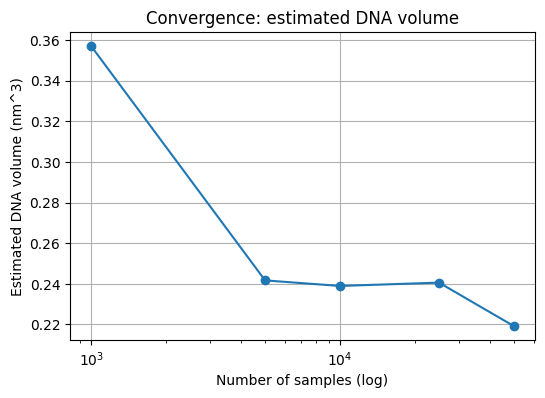

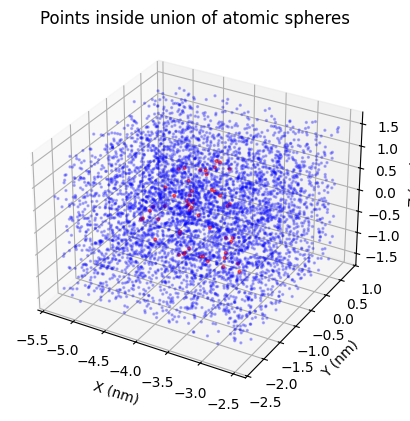

Box volume (nm^3): 27.464240
n=1000 fraction=0.013000 volume(nm^3)=0.357035 (Å^3=357.0)
n=5000 fraction=0.008800 volume(nm^3)=0.241685 (Å^3=241.7)
n=10000 fraction=0.008700 volume(nm^3)=0.238939 (Å^3=238.9)
n=25000 fraction=0.008760 volume(nm^3)=0.240587 (Å^3=240.6)
n=50000 fraction=0.007980 volume(nm^3)=0.219165 (Å^3=219.2)
Sum of individual sphere volumes (upper bound): 0.232509 nm^3 (232.5 Å^3)


In [ ]:
# Task 10 — Monte Carlo volume estimate (clean cell)
sample_sizes = [1000, 5000, 10000, 25000, 50000]
results = dna.estimate_dna_volume_monte_carlo(atoms, sample_sizes=sample_sizes, units='angstrom', padding_nm=padding_nm, plot_convergence=True, plot_3d=True)

# Display concise numeric summary
print(f"Box volume (nm^3): {results['box_volume']:.6f}")
for n, f, v in zip(results['sample_sizes'], results['fractions'], results['volumes_nm3']):
    print(f"n={n} fraction={f:.6f} volume(nm^3)={v:.6f} (Å^3={v*1000:.1f})")
print(f"Sum of individual sphere volumes (upper bound): {results['sum_sphere_vol']:.6f} nm^3 ({results['sum_sphere_vol']*1000:.1f} Å^3)")

# References

(Estimating Pi using the Monte Carlo Method) https://www.101computing.net/estimating-pi-using-the-monte-carlo-method/
